Question 2

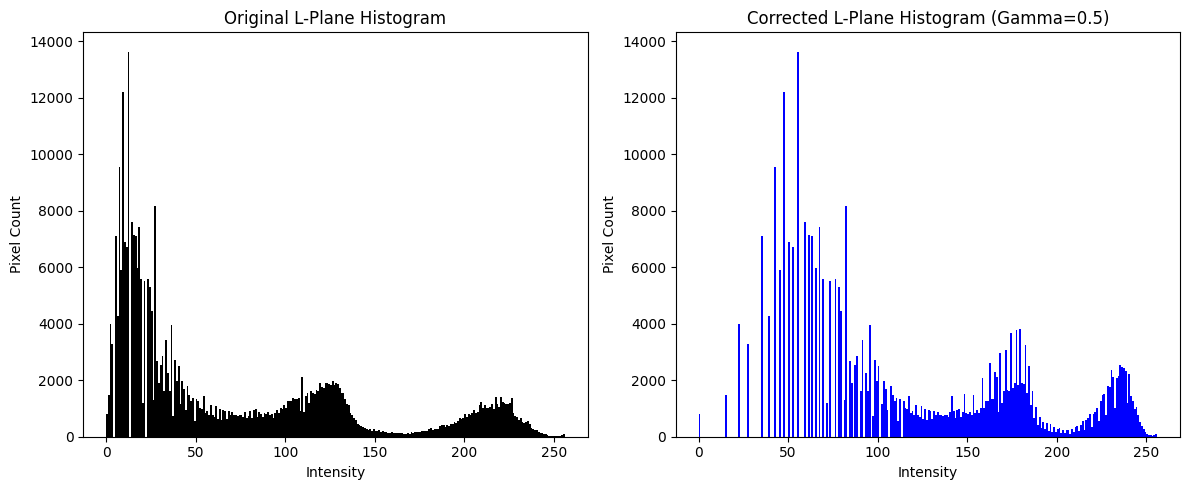

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction_Lplane(image_path, gamma_val):
    
    img = cv2.imread(image_path)
   

    #Convert to LAB color space 
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l_plane, a_plane, b_plane = cv2.split(lab_img)

    
    l_norm = l_plane.astype(np.float32) / 255.0
    l_corrected_norm = np.power(l_norm, gamma_val)
    l_corrected = (l_corrected_norm * 255).astype(np.uint8)

    
    lab_final = cv2.merge([l_corrected, a_plane, b_plane])
    img_final = cv2.cvtColor(lab_final, cv2.COLOR_LAB2BGR)

    #Show Histograms (Requirement b)
    plt.figure(figsize=(12, 5))

    # Original L-plane Histogram
    plt.subplot(1, 2, 1)
    plt.hist(l_plane.ravel(), 256, [0, 256], color='black')
    plt.title('Original L-Plane Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')

    # Corrected L-plane Histogram
    plt.subplot(1, 2, 2)
    plt.hist(l_corrected.ravel(), 256, [0, 256], color='blue')
    plt.title(f'Corrected L-Plane Histogram (Gamma={gamma_val})')
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')

    plt.tight_layout()
    plt.show()

    
    cv2.imshow('Original Image', img)
    cv2.imshow('Gamma Corrected (LAB L-plane)', img_final)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


gamma_correction_Lplane('highlights_and_shadows.jpg', 0.5)